In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
RB_df = new_players_df[(new_players_df['main_pos'].isin(['RB', 'RWB'])) | 
                                            (new_players_df['2nd_pos'].isin(['RB', 'RWB']))]

# Display the first few rows of the filtered DataFrame to verify
print(RB_df.head())


                league  season         team         player nation pos     age  \
1   ENG-Premier League    2324      Arsenal      Ben White    ENG  DF  26-181   
3   ENG-Premier League    2324      Arsenal  Cédric Soares    POR  DF  32-219   
40  ENG-Premier League    2324  Aston Villa     Matty Cash    POL  DF  26-243   
52  ENG-Premier League    2324  Bournemouth     Adam Smith    ENG  DF  32-343   
64  ENG-Premier League    2324  Bournemouth     James Hill    ENG  DF  22-087   

      born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
1   1997.0  25.7             2  ...               0.0        1652.0   
3   1991.0   0.7             0  ...               0.0          60.0   
40  1997.0  21.1             2  ...               0.0         941.0   
52  1991.0  17.8             0  ...               0.0         709.0   
64  2002.0   0.8             0  ...               0.0          28.0   

    Outcomes_Off  Outcomes_Blocks            League.6  Most_Frequent_Position  \
1    

C:\Users\jbuck\AppData\Local\Temp\ipykernel_9820\2322728201.py:7: DtypeWarning: Columns (6,31,55,79,103,135,166) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv(file_path)


In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        34   
1  ENG-Premier League    2324  Aston Villa                 30        34   
2  ENG-Premier League    2324  Bournemouth                 29        34   
3  ENG-Premier League    2324    Brentford                 28        34   
4  ENG-Premier League    2324     Brighton                 29        32   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     55                      2                       1   
1                     85                      2                       0   
2                     69                      3                       0   
3                     80                      2                       0   
4                     77                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   345                   35

In [3]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
RB_team_stats_df = pd.merge(RB_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
RB_team_stats_df = filter_players_by_games_played(RB_team_stats_df, '90s', 5)
print(RB_team_stats_df)


                 league  season             team                  player  \
0    ENG-Premier League    2324          Arsenal               Ben White   
2    ENG-Premier League    2324      Aston Villa              Matty Cash   
3    ENG-Premier League    2324      Bournemouth              Adam Smith   
5    ENG-Premier League    2324      Bournemouth              Max Aarons   
6    ENG-Premier League    2324        Brentford            Aaron Hickey   
..                  ...     ...              ...                     ...   
601          ARG-League    2324          Tucumán     Hernán De La Fuente   
603          ARG-League    2324          Tucumán            Renzo Tesuri   
604          ARG-League    2324  Vélez Sarsfield           Leonardo Jara   
605          ARG-League    2324  Vélez Sarsfield  Roberto Joaquín García   
606          ARG-League    2324  Vélez Sarsfield           Tomás Guidara   

    nation    pos     age    born   90s  Standard_Gls  ...  \
0      ENG     DF  26-181

In [4]:


# Correct column names if necessary
# Assume we correct them as follows if they are not found:
if 'Touches_Def 3rd_poss' not in RB_team_stats_df.columns or 'Touches_Mid 3rd_poss' not in RB_team_stats_df.columns:
    print("Column names are incorrect. Please verify the correct column names.")
    # You can rename or adjust the columns as needed here.

# Calculating the metrics
# Progressive distance per carry
RB_team_stats_df.loc[:, 'progressive_distance_per_carry'] = RB_team_stats_df['Carries_PrgDist'] / RB_team_stats_df['Carries_TotDist']

# Sum the individual player's touches in defensive and middle third
RB_team_stats_df.loc[:, 'total_player_touches_def_mid_third'] = RB_team_stats_df['Touches_Def 3rd'] + RB_team_stats_df['Touches_Mid 3rd']

# Sum the team's touches in defensive and middle third
RB_team_stats_df.loc[:, 'total_team_touches_def_mid_third'] = RB_team_stats_df['Touches_Def 3rd_poss'] + RB_team_stats_df['Touches_Mid 3rd_poss']

# Calculate the percentage of player's touches in the defensive or middle third per team touches in these zones
RB_team_stats_df.loc[:, 'touches_def_mid_third_per_team'] = (RB_team_stats_df['total_player_touches_def_mid_third'] / RB_team_stats_df['total_team_touches_def_mid_third']) * 100

# Progressive distance per pass
RB_team_stats_df.loc[:, 'progressive_distance_per_pass'] = RB_team_stats_df['Total_PrgDist'] / RB_team_stats_df['Total_Att']

# Percent of total passes per team passes
RB_team_stats_df.loc[:, 'percent_total_passes_per_team'] = (RB_team_stats_df['Total_Att'] / RB_team_stats_df['Total_Att_pass']) * 100

RB_team_stats_df.loc[:, 'progressive_passes_per_pass'] = (RB_team_stats_df['PrgP_pass'] / RB_team_stats_df['Total_Att']) 


In [5]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_progression(data, columns):
    """ Calculate Z-scores for log-transformed offensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_progression_score(data, columns, weights):
    """ Compute the weighted score for the 'Progression' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['progression_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['progression_score'].min()
    max_score = data['progression_score'].max()
    data['progression_score'] = ((data['progression_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

def prepare_final_df(original_df, score_df, score_column):
    """ Merge the calculated scores into the original DataFrame and ensure only relevant columns are included. """
    # Reset index if necessary to ensure 'player', 'team', and 'league' can be used as merge keys
    if 'player' not in score_df.columns or 'team' not in score_df.columns:
        score_df.reset_index(inplace=True)
    
    # Merge the scores and select only the relevant columns
    final_df = original_df[['player', 'team', 'league']].merge(score_df[['player', 'team', score_column]], on=['player', 'team'], how='left')
    return final_df

# Define columns and weights for offensive stats
progressive_columns = ['progressive_distance_per_carry', 'touches_def_mid_third_per_team', 'progressive_distance_per_pass', 'percent_total_passes_per_team', 'Total_Cmp%', 'progressive_passes_per_pass']
weights_progression = np.array([0.25, 0.15, 0.25, 0.10, 0.20, 0.05])  # Adjust weights as necessary, ensuring they sum to 1

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, progressive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, progressive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in progressive_columns]
scores_df_progressive = calculate_z_scores_progression(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_progressive = compute_progression_score(scores_df_progressive, log_transformed_columns, weights_progression)

# Prepare the final DataFrame for output
RB_scores_df = prepare_final_df(RB_team_stats_df, scores_df_progressive, 'progression_score')

# Display the DataFrame to check the results
print(RB_scores_df.head())


         player         team              league  progression_score
0     Ben White      Arsenal  ENG-Premier League          76.371593
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046


In [6]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


         player         team              league  progression_score
0     Ben White      Arsenal  ENG-Premier League          76.371593
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046


In [7]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_progressors = view_top_players(RB_scores_df, 'progression_score')
print(top_progressors)


                     player        team          league  progression_score
39             Jules Koundé   Barcelona     ESP-La Liga         100.000000
16644               Rafinha   São Paulo      BRA-League          98.359225
156    Lutsharel Geertruida   Feyenoord  NED-Eredivisie          96.895750
16638          Marcos Rocha   Palmeiras      BRA-League          92.217636
16706      Gastón Benavídez    Talleres      ARG-League          86.526542
99         Valentin Gendrey       Lecce     ITA-Serie A          85.116278
16691            Lucas Arce  Godoy Cruz      ARG-League          84.881756
97             Adam Marušić       Lazio     ITA-Serie A          84.365523
16668      João Mário Lopes       Porto      POR-League          83.668009
33         Andoni Gorosabel      Alavés     ESP-La Liga          83.568591


In [8]:
# Calculate clearances per 100 opposition touches in the attacking third
if 'Clr' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['clearances_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Clr'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate blocks per 100 opposition touches in the attacking third
if 'Blocks_Sh' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['blocks_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Blocks_Sh'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate tackles and interceptions per 100 opposition touches in the attacking third
if 'Tkl+Int' in RB_team_stats_df.columns and 'Touches_Att 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['tkl_and_int_per_100_opp_touch_in_att_3rd'] = (RB_team_stats_df['Tkl+Int'] / RB_team_stats_df['Touches_Att 3rd_allowed_poss']) * 100

# Calculate tackles and interceptions per 100 opposition touches in the attacking third
if 'Tkl+Int' in RB_team_stats_df.columns and 'Touches_Mid 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['tkl_and_int_per_100_opp_touch_in_mid_3rd'] = (RB_team_stats_df['Tkl+Int'] / RB_team_stats_df['Touches_Mid 3rd_allowed_poss']) * 100

# Calculate blocks per 100 opposition touches in the attacking third
if 'Blocks_Pass' in RB_team_stats_df.columns and 'Touches_Mid 3rd_allowed_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['blocks_per_100_opp_touch_in_mid_3rd'] = (RB_team_stats_df['Blocks_Pass'] / RB_team_stats_df['Touches_Mid 3rd_allowed_poss']) * 100

In [9]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_defensive(data, columns):
    """ Calculate Z-scores for log-transformed defensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_defensive_score(data, columns, weights):
    """ Compute the weighted score for defensive metrics, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['defensive_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['defensive_score'].min()
    max_score = data['defensive_score'].max()
    data['defensive_score'] = ((data['defensive_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for defensive stats
defensive_columns = ['clearances_per_100_opp_touch_in_att_3rd', 'blocks_per_100_opp_touch_in_att_3rd', 'tkl_and_int_per_100_opp_touch_in_att_3rd', 'tkl_and_int_per_100_opp_touch_in_mid_3rd', 'blocks_per_100_opp_touch_in_mid_3rd']
weights_defensive = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, defensive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, defensive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in defensive_columns]
scores_df_defensive = calculate_z_scores_defensive(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_defensive = compute_defensive_score(scores_df_defensive, log_transformed_columns, weights_defensive)

# Reset index if necessary and merge the scores
if 'player' not in RB_scores_df.columns or 'team' not in RB_scores_df.columns:
    RB_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_defensive.columns or 'team' not in scores_df_defensive.columns:
    scores_df_defensive.reset_index(inplace=True)

RB_scores_df = RB_scores_df.merge(scores_df_defensive[['player', 'team', 'defensive_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(RB_scores_df.head())


         player         team              league  progression_score  \
0     Ben White      Arsenal  ENG-Premier League          76.371593   
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852   
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248   
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139   
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046   

   defensive_score  
0        91.948910  
1        90.101493  
2        67.466176  
3        59.703455  
4        41.379345  


In [10]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


         player         team              league  progression_score  \
0     Ben White      Arsenal  ENG-Premier League          76.371593   
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852   
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248   
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139   
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046   

   defensive_score  
0        91.948910  
1        90.101493  
2        67.466176  
3        59.703455  
4        41.379345  


In [11]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_defenders = view_top_players(RB_scores_df, 'defensive_score')
print(top_defenders)


                 player            team              league  \
215           Trai Hume      Sunderland    ENG-Championship   
31          Pedro Porro       Tottenham  ENG-Premier League   
450    Gastón Benavídez        Talleres          ARG-League   
197     Ricardo Pereira  Leicester City    ENG-Championship   
440        Juan Cáceres           Lanús          ARG-League   
435          Lucas Arce      Godoy Cruz          ARG-League   
74          Hugo Siquet   Cercle Brugge      BEL-Pro League   
154      Siebe Horemans       Excelsior      NED-Eredivisie   
211  Kyle Walker-Peters     Southampton    ENG-Championship   
392        Tiago Esgaio          Arouca          POR-League   

     progression_score  defensive_score  
215          64.446559       100.000000  
31           66.424593        99.871342  
450          86.526542        97.576095  
197          69.551438        95.870364  
440          66.875859        94.867074  
435          84.881756        94.797769  
74          

In [12]:
RB_scores_df

,player,team,league,progression_score,defensive_score
0,Ben White,Arsenal,ENG-Premier League,76.371593,91.948910
1,Matty Cash,Aston Villa,ENG-Premier League,51.222852,90.101493
2,Adam Smith,Bournemouth,ENG-Premier League,36.780248,67.466176
3,Max Aarons,Bournemouth,ENG-Premier League,61.754139,59.703455
4,Aaron Hickey,Brentford,ENG-Premier League,44.574046,41.379345
...,...,...,...,...,...
454,Hernán De La Fuente,Tucumán,ARG-League,68.435635,30.685151
455,Renzo Tesuri,Tucumán,ARG-League,46.124304,91.936224
456,Leonardo Jara,Vélez Sarsfield,ARG-League,48.809372,65.234699
457,Roberto Joaquín García,Vélez Sarsfield,ARG-League,47.002773,39.921976


In [13]:
import pandas as pd

# Assuming RB_team_stats_df is already defined and includes all the necessary columns

# Calculate xG per 90
if 'Expected_xG' in RB_team_stats_df.columns and '90s' in RB_team_stats_df.columns:
    RB_team_stats_df['xG_per_90'] = (RB_team_stats_df['Expected_xG'] / RB_team_stats_df['90s'])

# Calculate xA per 90
if 'Expected_xA' in RB_team_stats_df.columns and '90s' in RB_team_stats_df.columns:
    RB_team_stats_df['xA_per_90'] = (RB_team_stats_df['Expected_xA'] / RB_team_stats_df['90s'])

# Calculate Key Passes per 100 touches in the attacking third
if 'KP' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['KP_per_100_touches_att_3rd'] = (RB_team_stats_df['KP'] / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Calculate Shot Creating Actions per 100 touches in the attacking third
if 'SCA_SCA' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['SCA_per_100_touches_att_3rd'] = (RB_team_stats_df['SCA_SCA'] / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Calculate passes and carries into the penalty area per 100 touches in the final third
if 'Carries_CPA' in RB_team_stats_df.columns and 'PPA' in RB_team_stats_df.columns and 'Touches_Att 3rd_poss' in RB_team_stats_df.columns:
    RB_team_stats_df['PA_and_carries_per_100_touches_final_3rd'] = ((RB_team_stats_df['Carries_CPA'] + RB_team_stats_df['PPA']) / RB_team_stats_df['Touches_Att 3rd_poss']) * 100

# Display the first few rows to verify the calculations
print(RB_team_stats_df[['xG_per_90', 'xA_per_90', 'KP_per_100_touches_att_3rd', 'SCA_per_100_touches_att_3rd', 'PA_and_carries_per_100_touches_final_3rd']].head())


   xG_per_90  xA_per_90  KP_per_100_touches_att_3rd  \
0   0.027237   0.112840                    0.347003   
2   0.194313   0.109005                    0.267640   
3   0.000000   0.067416                    0.270636   
5   0.000000   0.074380                    0.189445   
6   0.025316   0.012658                    0.027678   

   SCA_per_100_touches_att_3rd  PA_and_carries_per_100_touches_final_3rd  
0                     0.851735                                  0.599369  
2                     0.948905                                  0.802920  
3                     0.568336                                  0.514208  
5                     0.541272                                  0.514208  
6                     0.193745                                  0.083033  


In [14]:
import pandas as pd
import numpy as np

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def calculate_z_scores_offensive(data, columns):
    """ Calculate Z-scores for log-transformed offensive columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_attacking_score(data, columns, weights):
    """ Compute the weighted score for the 'Attacking Right Back' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['attacking_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['attacking_score'].min()
    max_score = data['attacking_score'].max()
    data['attacking_score'] = ((data['attacking_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for offensive stats
offensive_columns = ['xG_per_90', 'xA_per_90', 'KP_per_100_touches_att_3rd', 'SCA_per_100_touches_att_3rd', 'PA_and_carries_per_100_touches_final_3rd']
weights_offensive = np.array([0.10, 0.15, 0.25, 0.25, 0.25])

# Assuming RB_team_stats_df is preloaded with your data
# Cap extreme values
RB_team_stats_df = cap_extreme_values(RB_team_stats_df, offensive_columns)

# Apply log transformation
RB_team_stats_df = log_transform(RB_team_stats_df, offensive_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in offensive_columns]
scores_df_offensive = calculate_z_scores_offensive(RB_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_offensive = compute_attacking_score(scores_df_offensive, log_transformed_columns, weights_offensive)

# Reset index if necessary and merge the scores
if 'player' not in RB_scores_df.columns or 'team' not in RB_scores_df.columns:
    RB_scores_df.reset_index(inplace=True)

if 'player' not in scores_df_offensive.columns or 'team' not in scores_df_offensive.columns:
    scores_df_offensive.reset_index(inplace=True)

RB_scores_df = RB_scores_df.merge(scores_df_offensive[['player', 'team', 'attacking_score']], on=['player', 'team'], how='left')

# Print the updated DataFrame to check the results
print(RB_scores_df.head())


         player         team              league  progression_score  \
0     Ben White      Arsenal  ENG-Premier League          76.371593   
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852   
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248   
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139   
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046   

   defensive_score  attacking_score  
0        91.948910        75.263142  
1        90.101493        78.750388  
2        67.466176        56.686748  
3        59.703455        53.708056  
4        41.379345        17.392138  


In [15]:
# Drop duplicates based on 'team', 'player', and 'league' columns
RB_scores_df = RB_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(RB_scores_df.head())


         player         team              league  progression_score  \
0     Ben White      Arsenal  ENG-Premier League          76.371593   
1    Matty Cash  Aston Villa  ENG-Premier League          51.222852   
2    Adam Smith  Bournemouth  ENG-Premier League          36.780248   
3    Max Aarons  Bournemouth  ENG-Premier League          61.754139   
4  Aaron Hickey    Brentford  ENG-Premier League          44.574046   

   defensive_score  attacking_score  
0        91.948910        75.263142  
1        90.101493        78.750388  
2        67.466176        56.686748  
3        59.703455        53.708056  
4        41.379345        17.392138  


In [16]:
# Columns that contain scores
score_columns = ['progression_score', 'defensive_score', 'attacking_score']

# Round each score column to two decimal places
for column in score_columns:
    if column in RB_scores_df.columns:
        RB_scores_df[column] = RB_scores_df[column].round(2)

# Display the DataFrame to verify the changes
print(RB_scores_df.head())


         player         team              league  progression_score  \
0     Ben White      Arsenal  ENG-Premier League              76.37   
1    Matty Cash  Aston Villa  ENG-Premier League              51.22   
2    Adam Smith  Bournemouth  ENG-Premier League              36.78   
3    Max Aarons  Bournemouth  ENG-Premier League              61.75   
4  Aaron Hickey    Brentford  ENG-Premier League              44.57   

   defensive_score  attacking_score  
0            91.95            75.26  
1            90.10            78.75  
2            67.47            56.69  
3            59.70            53.71  
4            41.38            17.39  


In [17]:
import pandas as pd
import numpy as np
import re

# Create a new column called 'age' in CB_scores
RB_scores_df['age'] = None

# Loop through each row in CB_scores
for index, row in RB_scores_df.iterrows():
    # Get the team and player name from the current row
    team = row['team']
    player = row['player']

    # Find the matching player in the players_df
    matching_player = players_df[(players_df['team'] == team) & (players_df['player'] == player)]

    # If a matching player is found, update the 'age' column in CB_scores
    if not matching_player.empty:
        RB_scores_df.loc[index, 'age'] = matching_player['age'].values[0]

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
RB_scores_df['age'] = RB_scores_df['age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if pd.notnull(x) else x)

# Print the CB_scores DataFrame to verify
print(RB_scores_df)

                     player             team              league  \
0                 Ben White          Arsenal  ENG-Premier League   
1                Matty Cash      Aston Villa  ENG-Premier League   
2                Adam Smith      Bournemouth  ENG-Premier League   
3                Max Aarons      Bournemouth  ENG-Premier League   
4              Aaron Hickey        Brentford  ENG-Premier League   
..                      ...              ...                 ...   
454     Hernán De La Fuente          Tucumán          ARG-League   
455            Renzo Tesuri          Tucumán          ARG-League   
456           Leonardo Jara  Vélez Sarsfield          ARG-League   
457  Roberto Joaquín García  Vélez Sarsfield          ARG-League   
458           Tomás Guidara  Vélez Sarsfield          ARG-League   

     progression_score  defensive_score  attacking_score  age  
0                76.37            91.95            75.26   26  
1                51.22            90.10            78.7

In [ ]:
import pandas as pd
import subprocess

# Assuming RB_scores_df is defined elsewhere in your notebook
RB_scores_df.to_csv('Right Back Role Scores.csv', index=False)

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Properly quote the filename to handle spaces
run_command('git add "Right Back Role Scores.csv"')
run_command('git commit -m "Add or update Right Back Role Scores.csv"')

# Make sure the branch 'main' exists by checking your GitHub repo or by running 'git branch' locally.
run_command('git push origin main')  # Adjust branch name if necessary


In [ ]:
import subprocess

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Add, commit, pull, and then push
run_command('git add "creating left back scores.ipynb"')
run_command('git commit -m "Update notebook with latest changes"')
run_command('git pull origin main')  # Pull before pushing to ensure the local repo is up-to-date
run_command('git push origin main')  # Adjust branch name if necessary


C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


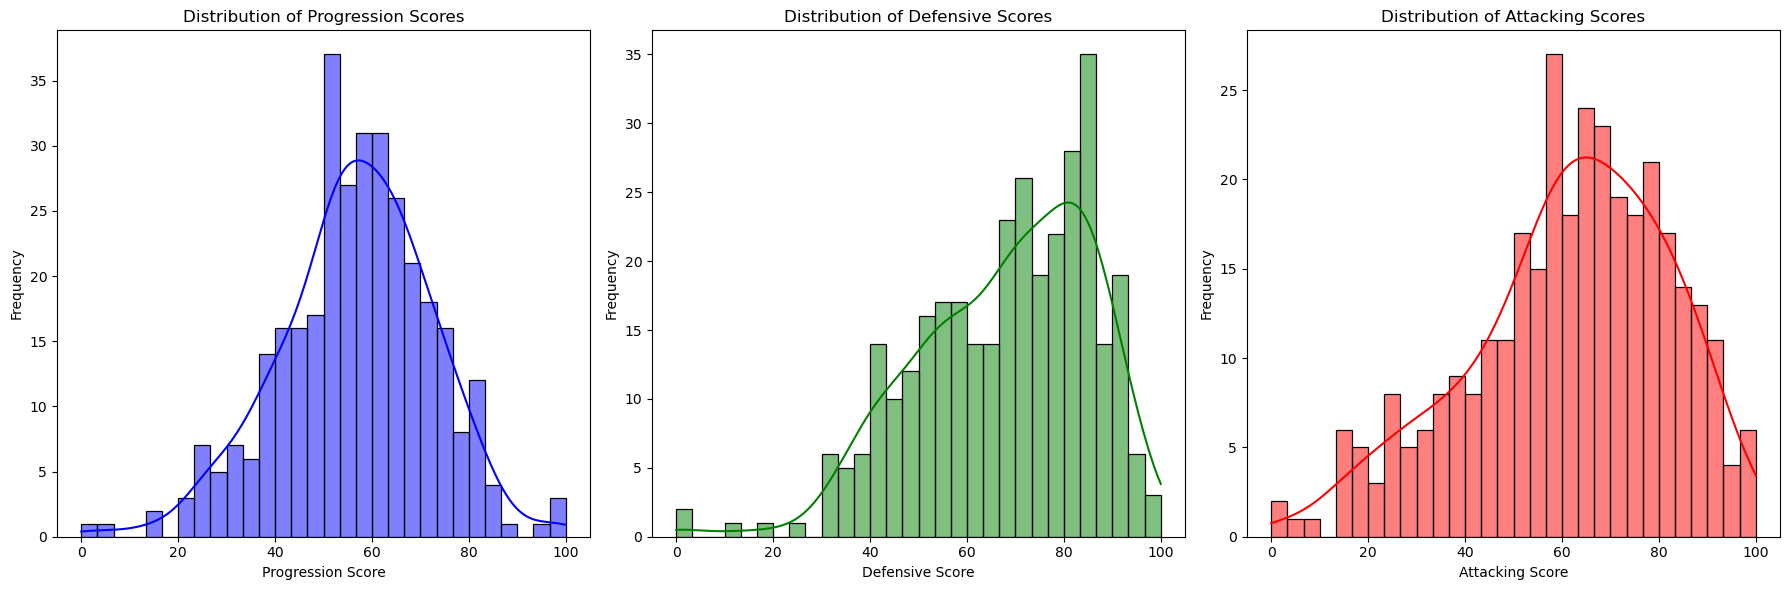

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(RB_scores_df['progression_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Progression Scores')
plt.xlabel('Progression Score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(RB_scores_df['defensive_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Defensive Scores')
plt.xlabel('Defensive Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(RB_scores_df['attacking_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Attacking Scores')
plt.xlabel('Attacking Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [19]:
# Display descriptive statistics for the three score columns
descriptive_statistics = RB_scores_df[['progression_score', 'defensive_score', 'attacking_score']].describe()
print(descriptive_statistics)


       progression_score  defensive_score  attacking_score
count         331.000000       331.000000       331.000000
mean           56.647221        67.902356        61.453716
std            15.634970        17.931236        20.704153
min             0.000000         0.000000         0.000000
25%            47.460000        55.595000        49.390000
50%            57.240000        70.510000        63.480000
75%            66.860000        82.840000        77.200000
max           100.000000       100.000000       100.000000
